In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('suicide_detection_full_cleaned.csv')
df = pd.read_csv('suicide_detection_final_cleaned.csv')
df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


In [3]:
# ver articulo sobre este tema en:
# https://machinelearningmastery.com/what-is-imbalanced-classification/
df['class'].value_counts()

class
non-suicide    107066
suicide         67902
Name: count, dtype: int64

In [4]:
df['class']=df['class'].apply(lambda x: 1 if x=='suicide' else 0)
df['cleaned_text'] = df['cleaned_text'].astype('U')
df.dtypes

text            object
class            int64
cleaned_text    object
dtype: object

### Import dependencies related to model training

#### Now I have to divide the data for training and testing, afterwards I need to vectorize the text

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['class'])

### In order to train the model One has to vectorize the data

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

### Training the model

In [7]:
from sklearn.svm import SVC

model = SVC()

In [8]:
model.fit(X_train_count, y_train)

SVC()

### Testing the model againts the X_train, y_train

In [9]:
model.score(X_train_count, y_train)

0.9559995732553

### Testing the model: X_test

In [10]:
X_test_count = v.transform(X_test)
X_test_count

<43742x63697 sparse matrix of type '<class 'numpy.int64'>'
	with 765775 stored elements in Compressed Sparse Row format>

### Model score against test data

In [11]:
model.score(X_test_count, y_test)

0.9227515888619633

### Array of the predicted values

In [12]:
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Lets try out some manual predictions

In [13]:
text_test = ['I wanna die',
             'My life has no meaning', 
             'My next vacation trip will be awesome',
             'I enjoy everything, my family, my cats, my kids',
             'I love my dog',
             'What the fuck dude',
             'Why to continue living',
             'What happened to your mom, She died?',
             'I gotta go to work everyday and yet it feels like the right thing to do for happiness',
             'I am so hungry',
             'My wife is swimming in the pool'
             ]

# in order to pass text_test to the model it has to be vectorized
text_test_count = v.transform(text_test)
model.predict(text_test_count)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### Metrics analysis
#### All dependencies related to metrics

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss

In [15]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9227515888619633
precision_score: 0.9196506550218341
recall_score:  0.8757797184102656
f1_score:  0.8971791984907038
roc_auc_score:  0.9139573459196149


### Visualizing the confusion matrix

In [16]:
confusion_matrix(y_test,y_pred)

array([[25621,  1288],
       [ 2091, 14742]], dtype=int64)

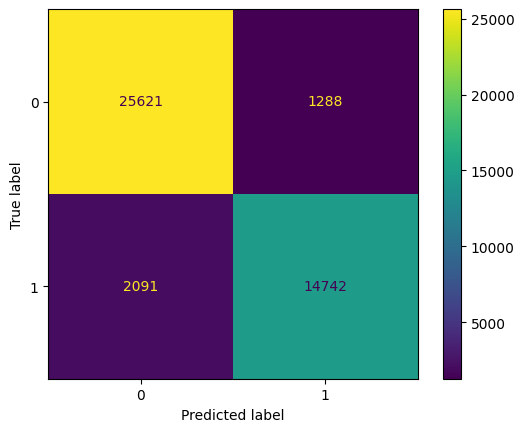

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

### Creating Data Balance - Subsampling

In [19]:
df_0 = df[df['class']==0]
df_0.head()

,text,class,cleaned_text
1,Am I weird I don't get affected by compliments...,0,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,0,finally hear bad year swear fucking god annoying
10,Fuck the verizon smart family app I can’t even...,0,fuck verizon smart family app not watch porn p...
11,"Well, Im screwed. I locked myself in the schoo...",0,screw lock school toilet not edit live tell story
12,I'm fucked assignment is due tomorrow and I ha...,0,fuck assignment tomorrow not start


In [20]:
df_1 = df[df['class']==1]
df_1.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,1,ex wife threaten suiciderecently leave wife go...
3,i need helpjust help me im crying so hard,1,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,1,end tonight not anymore quit
5,I took the rest of my sleeping pills and my pa...,1,take rest sleeping pill painkillersi not wait ...
6,Can you imagine getting old? Me neither.Wrinkl...,1,imagine get old wrinkle weight gain hair loss ...


In [21]:
size = df_1['class'].size
size

67902

In [22]:
# Now I have to subsample the greater dataset to n = size of the smaller one
df_00 = df_0.sample(n=size, replace=False, random_state=0)
subsample_df = pd.concat([df_00, df_1])
# now the data is balanced by the subsampling method
subsample_df['class'].value_counts()

class
0    67902
1    67902
Name: count, dtype: int64

### Let's train the model again

In [23]:
X_train, X_test, y_train, y_test = train_test_split(subsample_df['cleaned_text'], subsample_df['class'])

In [24]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [25]:
model_sub = SVC()

In [26]:
model_sub.fit(X_train_count, y_train)

SVC()

In [27]:
model_sub.score(X_train_count, y_train)

0.9522645381088432

### Model score against test data

In [28]:
X_test_count = v.transform(X_test)
## Checking the score of the model against test data
model_sub.score(X_test_count, y_test)

0.9187652793732143

In [29]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model_sub.predict(X_test_count)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9187652793732143
precision_score: 0.9326503394762367
recall_score:  0.9032996712071395
f1_score:  0.9177403960868528
roc_auc_score:  0.9188169258571308


### Confusion matrix

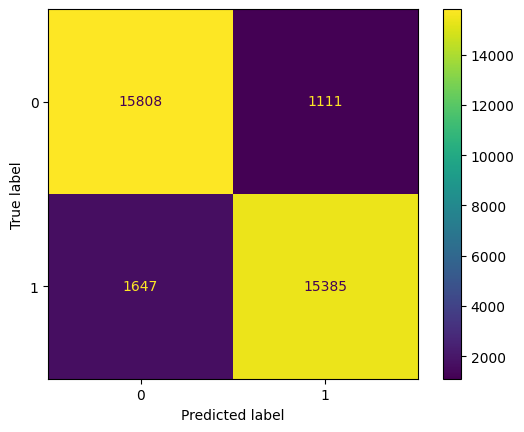

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=model_sub.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model_sub.classes_)
disp.plot()
plt.show()

### Creating Data Balance - oversampling

In [32]:
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]

In [33]:
size = df_0['class'].size
size

107066

In [34]:
df_1 = df_1.sample(n=size, replace=True, random_state=0)
oversample_df = pd.concat([df_0, df_1])

In [35]:
# now the data is balanced by the subsampling method
oversample_df['class'].value_counts()

class
0    107066
1    107066
Name: count, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(oversample_df['cleaned_text'], oversample_df['class'])

In [37]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [38]:
model_over = SVC()

In [39]:
model_over.fit(X_train_count, y_train)

SVC()

In [40]:
model_over.score(X_train_count, y_train)

0.9601056046426192

### Model score against test data

In [41]:
X_test_count = v.transform(X_test)
## Checking the score of the model against test data
model_over.score(X_test_count, y_test)

0.9372349765565166

In [43]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model_over.predict(X_test_count)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [44]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.9372349765565166
precision_score: 0.9430276310288472
recall_score:  0.9302290705957336
f1_score:  0.9365846293220594
roc_auc_score:  0.9372105889091846


### Confusion matrix

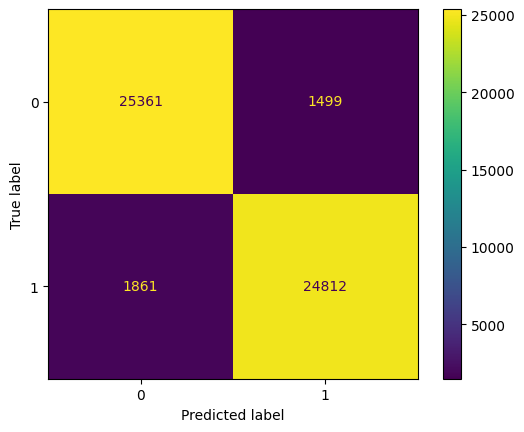

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=model_over.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model_over.classes_)
disp.plot()
plt.show()